<a href="https://colab.research.google.com/github/Snomty/Random_graphs/blob/Minacov%2Fgraphs-implementation/Random_graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# **Создадим функции для реализации наших случайных величин**

*   Распределение Вейбулла с параметрами $\space\space k = \frac{1}{2} ,\space\space\space$$\lambda = \frac{1}{\sqrt{10}}$

*   Гамма-распределение с параметрами $\space\space k = \frac{1}{2} ,\space\space\space$$\lambda = \frac{1}{\sqrt{2}}$



In [ ]:
def gen_weibull_points(num_points: int) -> np.ndarray[np.float64]:
    """ Возвращает num_points точек сгенерированных по распределению Вейбулла """
    return 1 / np.sqrt(10) * np.random.weibull(0.5, num_points)


def gen_gamma_points(num_points: int) -> np.ndarray[np.float64]:
    """ Возвращает num_points точек сгенерированных по гамма-распределению """
    return np.random.gamma(0.5, 1 / np.sqrt(2), num_points)

# **Создадим класс графа для удобного хранения и работы.**

### **Договор про хранение графов:**

**Граф храним специальным классом с полями:**

*   вершины графа храним списком.
$V_G = (x_{1}, x_{2}, \dots, x_{k})$

    где $k$ - количество вершин графа, $x_i$ - координата $i$-ой вершины

*  ребра графа храним множеством. $E_G = \{ (a_1, b_1), (a_2, b_2), \dots\}$

    где $\space\space a_i < b_i\space\space$ - номера вершин

*  Также храним обьект NetworkX.Graph для удобного использования разных алгоритмов на графах

**Класс имеет 3 метода - 2 для построение ребер, соответсвующих KNN и Distance графам и 1 для визуализации.**


In [ ]:
class Graph:
    def __init__(self, points: np.ndarray[float], edges: set[tuple[int, int]] = set()) -> None:
        self.V = points
        self.E = edges
        self.nx_obj = nx.empty_graph(len(points))
        self.nx_obj.add_edges_from(edges)


    def build_KNN_graph(self, K: int) -> None:
        """ Строит ребра KNN графа """
        self.E = set()

        for idx_1, x_1 in enumerate(self.V):
            dist = []
            for idx_2, x_2 in enumerate(self.V):
                dist.append([np.linalg.norm(x_1 - x_2), idx_2])
            for nearest in sorted(dist)[1:K+1]:
                self.E.add( (min(idx_1, nearest[1]), max(idx_1, nearest[1])) )

        self.nx_obj.clear_edges()
        self.nx_obj.add_edges_from(self.E)

    def build_dist_graph(self, max_dist: int) -> None:
        """ Строит ребра Distance графа """
        self.E = set()

        for idx_1, x_1 in enumerate(self.V):
            dist = []
            for idx_2, x_2 in enumerate(self.V):
                if (idx_2 <= idx_1):
                    continue
                if np.linalg.norm(x_1 - x_2) <= max_dist:
                    self.E.add( (idx_1, idx_2) )

        self.nx_obj.clear_edges()
        self.nx_obj.add_edges_from(self.E)

    def draw(self) -> None:
        """ Рисует граф """
        if (len(self.V) == 0):
            print("Пустой граф.")
            return

        for e in self.E:
            x1, y1 = self.V[e[0]], e[0]
            x2, y2 = self.V[e[1]], e[1]
            plt.plot([x1, x2], [y1, y2], 'b-', linewidth=1)
        plt.scatter(self.V, range(len(self.V)), color="blue")
        plt.title("Наш граф")
        plt.xlabel("Ее координата")
        plt.ylabel("Номер вершины")

## Демонстрация работы

Создадим **Distance** граф с **max_distance=0.15** вершины которого представляют собой реализации

случайной величины (в нашем случае с гамма-распределением с параметрами $\space\space k = \frac{1}{2} ,\space\space\space$$\lambda = \frac{1}{\sqrt{2}}$)

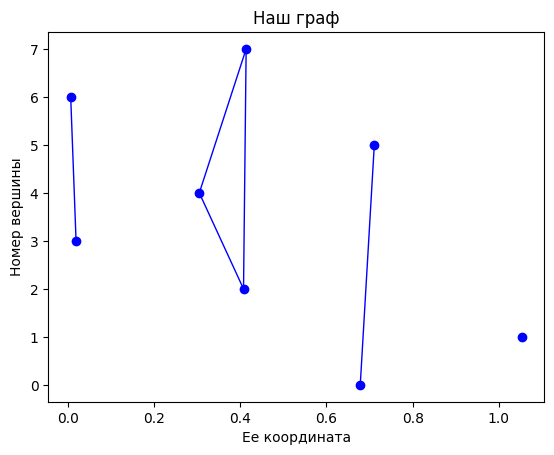

In [ ]:
Distance_Gamma = Graph(points = gen_gamma_points(8))

Distance_Gamma.build_dist_graph(max_dist = 0.15)

Distance_Gamma.draw()

Создадим **2_NN** граф вершины которого представляют собой реализации случайной

величины (в нашем случае с распределением Вейбулла с параметрами $\space\space k = \frac{1}{2} ,\space\space\space$$\lambda = \frac{1}{\sqrt{10}}$)

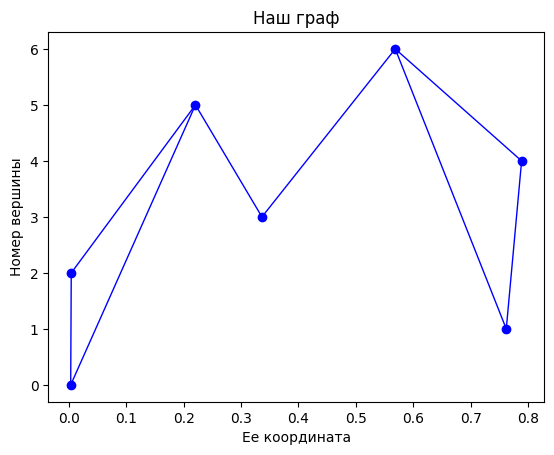

In [ ]:
TwoNN_Weibull = Graph(points = gen_weibull_points(7))

TwoNN_Weibull.build_KNN_graph(K = 2)

TwoNN_Weibull.draw()